In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [2]:
roc=pd.read_csv("C:/Users/Mano/Documents/imarticus/Flight.csv")

In [3]:
roc.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

In [4]:
roc.Length.fillna(roc.Length.mean(),inplace=True)

In [5]:
roc.PaperQuality.fillna("PaperQuality",inplace=True)

In [6]:
roc.Angle.fillna("Angle",inplace=True)

In [7]:
roc.isnull().sum()

Person             0
Item_Identifier    0
Length             0
Breadth            0
PaperQuality       0
Angle              0
Foldings           0
Windspeed          0
Dominanthand       0
Distance           0
dtype: int64

In [8]:
roc.drop(["PaperQuality","Item_Identifier"],axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x131cbfe2430>,
 'caps': [<matplotlib.lines.Line2D at 0x131cbfe2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x131cb928fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x131cbff11f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x131cbff1580>],
 'means': []}

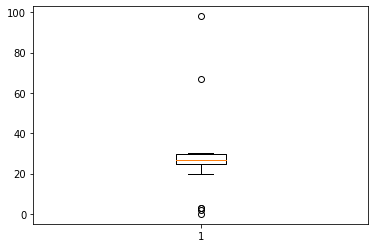

In [9]:
plt.boxplot(roc.Length)

In [10]:
q3=roc["Length"].quantile(0.75)
q1=roc["Length"].quantile(0.25)
iqr= q3-q1

In [11]:
lower_limt=q1-(iqr*1.5)
upper_limt=q3+(iqr*1.5)

In [12]:
upper_limt

37.0

In [13]:
lower_limt

17.0

In [14]:
roc["Length"]=np.where(roc["Length"] >= upper_limt,upper_limt,np.where(roc["Length"] <= lower_limt,lower_limt,roc["Length"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x131cd0b39a0>,
 'caps': [<matplotlib.lines.Line2D at 0x131cd0c0100>,
 'boxes': [<matplotlib.lines.Line2D at 0x131cd0b3610>],
 'medians': [<matplotlib.lines.Line2D at 0x131cd0c0820>],
 'fliers': [<matplotlib.lines.Line2D at 0x131cd0c0bb0>],
 'means': []}

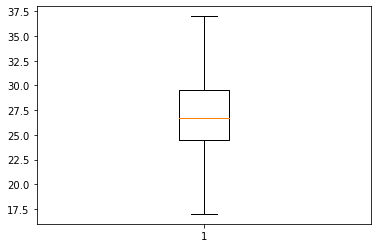

In [15]:
plt.boxplot(roc.Length)

In [16]:
dummie = pd.get_dummies(roc)

In [17]:
dummie.shape

(88, 15)

In [18]:
dummie.head()

,Length,Breadth,Foldings,Distance,Person_Giri,Person_Kevin,Person_Priya,Person_Shabana,Angle_Angle,Angle_L,Angle_U,Windspeed _Off,Windspeed _On,Dominanthand_L,Dominanthand_R
0,29.000000,20.0,8,5,0,1,0,0,0,0,1,0,1,1,0
1,23.000000,16.0,8,5,0,1,0,0,0,0,1,0,1,1,0
2,26.708451,18.0,10,6,0,1,0,0,0,1,0,0,1,0,1
3,27.000000,20.0,10,4,0,0,1,0,0,0,1,0,1,0,1
4,29.500000,17.5,5,8,0,0,1,0,0,0,1,1,0,0,1


In [19]:
x=dummie.drop(["Distance"],axis=1)

In [20]:
y=dummie["Distance"]

In [21]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=42)

# logistic regression

In [22]:
model = LogisticRegression().fit(trainx,trainy)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model.predict(testx)

array([7, 6, 3, 7, 7, 7, 7, 6, 7, 7, 7, 5, 5, 6, 6, 5, 7, 6], dtype=int64)

In [24]:
m=model.score(testx,testy)

In [25]:
m

0.1111111111111111

In [26]:
rme=sqrt(mean_squared_error(testy,model.predict(testx)))

In [27]:
rme

1.9293061504650375

# RandomForestClassifier

In [28]:
regr = RandomForestClassifier(random_state=0)
regr.fit(x, y)

RandomForestClassifier(random_state=0)

In [29]:
regr.predict(testx)

array([7, 6, 7, 6, 5, 7, 4, 8, 7, 5, 7, 5, 8, 5, 8, 5, 7, 6], dtype=int64)

In [30]:
s=regr.score(testx,testy)

In [31]:
s

0.5555555555555556

In [32]:
rme2=sqrt(mean_squared_error(testy,regr.predict(testx)))

In [33]:
rme2

1.224744871391589

# GradientBoostingClassifier

In [34]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(trainx, trainy)


In [35]:
clf.predict(testx)

array([7, 6, 4, 9, 7, 7, 7, 8, 7, 7, 7, 7, 3, 5, 8, 5, 7, 6], dtype=int64)

In [36]:
d=clf.score(testx, testy)

In [37]:
d

0.2222222222222222

In [38]:
rme3=sqrt(mean_squared_error(testy,clf.predict(testx)))

In [39]:
rme3

2.2973414586817036

# AdaBoostClassifier

In [40]:
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0).fit(trainx,trainy)


In [41]:
clf2.predict(testx)

array([7, 6, 3, 6, 7, 7, 7, 5, 7, 7, 7, 5, 6, 6, 5, 7, 7, 6], dtype=int64)

In [42]:
g=clf2.score(testx, testy)

In [43]:
g

0.2777777777777778

In [44]:
rme4=sqrt(mean_squared_error(testy,clf2.predict(testx)))

In [45]:
rme4

1.8408935028645435

# DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(trainx,trainy)

DecisionTreeClassifier(random_state=0)

In [47]:
dt.predict(testx)

array([1, 6, 4, 3, 7, 1, 1, 6, 7, 7, 7, 5, 3, 5, 6, 5, 7, 6], dtype=int64)

In [48]:
c=dt.score(testx,testy)

In [49]:
c

0.1111111111111111

In [50]:
rme5=sqrt(mean_squared_error(testy,dt.predict(testx),squared=False))

In [51]:
rme5

1.6788654167466672

In [52]:
from tabulate import tabulate

In [53]:
mydata = [
    ["logistic regression",m],
    ["decision_tree_Classifier", c],
    ["random_forest_Classifier", s],
    ["gradient_boosting_Classifier",d],
    ["ada_boosting_Classifier",g]
    ]

In [54]:
head1 = ["Method", "score"]

In [55]:
print(tabulate(mydata, headers=head1, tablefmt="grid"))

+------------------------------+----------+
| Method                       |    score |
+==============================+==========+
| logistic regression          | 0.111111 |
+------------------------------+----------+
| decision_tree_Classifier     | 0.111111 |
+------------------------------+----------+
| random_forest_Classifier     | 0.555556 |
+------------------------------+----------+
| gradient_boosting_Classifier | 0.222222 |
+------------------------------+----------+
| ada_boosting_Classifier      | 0.277778 |
+------------------------------+----------+


In [56]:
mydata2 = [
    ["logistic regression",rme],
    ["decision_tree_Classifier",rme5],
    ["random_forest_Classifier", rme2],
    ["gradient_boosting_Classifier",rme3],
    ["ada_boosting_Classifier",rme4]
    ]

In [57]:
head = ["Method", "rootmean"]

In [58]:
print(tabulate(mydata2, headers=head, tablefmt="grid"))

+------------------------------+------------+
| Method                       |   rootmean |
+==============================+============+
| logistic regression          |    1.92931 |
+------------------------------+------------+
| decision_tree_Classifier     |    1.67887 |
+------------------------------+------------+
| random_forest_Classifier     |    1.22474 |
+------------------------------+------------+
| gradient_boosting_Classifier |    2.29734 |
+------------------------------+------------+
| ada_boosting_Classifier      |    1.84089 |
+------------------------------+------------+
